# Herz Erkrankungen - Wer ist erkrankt?

![heart_desease.png](heart_desease.png)

### 1. Bibliotheken importieren

In [23]:
%pip install pandas seaborn matplotlib numpy torch sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

### 2. Daten laden

Datenquelle: https://archive.ics.uci.edu/dataset/45/heart+disease

In [25]:
data = pd.read_csv("heart.csv")

### 3. Erster Einblick in Daten

- gewinne eine erste Übersicht über die Date
- schaue, ob eventuell Daten fehlen
- wie sind die Daten verteilt

<details>
  <summary><b>Hinweis</b></summary>
  <p><code>.head(n)</code> (n=Anzahl der Spalten): zeigt die ersten n Spalten des DataFrames</p>
  <p><code>.info()</code>: Übersicht des DataFrames (Anzahl der Einträge, Spaltennamen, Datentypen, Speicherverbrauch)</p>
  <p><code>.describe()</code>: statistische Übersicht für numerische Spalten (Mittelwert, Standardabweichung, Minimum, Maximum)</p>
</details>

In [26]:
# A1: Schaue dir die Metainformationen an, wie Nullwerte, Datentypen, etc.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [27]:
# A2: Schaue dir die Statistik der Daten an

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Datenbeschreibung

| Feature   | Description | Values |
|-----------|-------------|--------|
| age       | Age in years | - |
| sex       | Sex | 1 = male, 0 = female |
| cp        | Chest pain type | 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic |
| trestbps  | Resting blood pressure (in mm Hg on admission to the hospital) | - |
| chol      | Serum cholesterol in mg/dl | - |
| fbs       | Fasting blood sugar > 120 mg/dl | 1 = true, 0 = false |
| restecg   | Resting electrocardiographic results | 0 = normal, 1 = ST-T wave abnormality, 2 = probable or definite left ventricular hypertrophy by Estes' criteria |
| thalach   | Maximum heart rate achieved | - |
| exang     | Exercise-induced angina | 1 = yes, 0 = no |
| oldpeak   | ST depression induced by exercise relative to rest | - |
| slope     | Slope of the peak exercise ST segment | 0 = upsloping, 1 = flat, 2 = downsloping |
| ca        | Number of major vessels colored by fluoroscopy | 0–3 |
| thal      | Thallium stress test result | 0 = error/NaN, 1 = fixed defect, 2 = normal, 3 = reversible defect |
| target    | Diagnosis of heart disease | 0 = no disease, 1 = disease |



<details>
  <summary><b>Folgerung</b></summary>
  <ul>
    <li><b>data["ca"]:</b> enthält Werte > 3, die inkorrekt sind. Diese Werte sollten entfernt werden.</li>
    <li><b>data["thal"]:</b> enthält Werte = 0, die inkorrekt sind. Diese Werte sollten ebenfalls entfernt werden.</li>
  </ul>
</details>

In [28]:
data = data[data['ca'] < 4]
data = data[data['thal'] > 0]

### Wissenseinschub - Thema und Daten verstehen

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Informationsraster</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            display: flex;
            justify-content: center;
            align-items: center;
            background-color: #f4f4f4;
            margin: 0;
            padding: 5vw; /* Dynamischer Abstand basierend auf der Bildschirmbreite */
            box-sizing: border-box;
            color: black;
        }
        .grid-container {
            display: grid;
            grid-template-columns: repeat(2, 1fr);
            grid-template-rows: repeat(3, 1fr);
            gap: 5vw; /* Dynamischer Abstand zwischen den Grid-Items */
            width: 100%;
            max-width: 100%; /* Container passt sich der Bildschirmbreite an */
            padding: 2vw; /* Dynamischer Innenabstand basierend auf der Bildschirmbreite */
            box-sizing: border-box;
        }
        .grid-item {
            background: white;
            padding: 2vw; /* Dynamischer Innenabstand basierend auf der Bildschirmbreite */
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            text-align: center;
            display: flex;
            flex-direction: column;
            justify-content: space-between;
        }
        .grid-item img {
            width: 100%; /* Bildbreite passt sich der Breite des Grid-Items an */
            height: auto; /* Höhe wird automatisch angepasst, um das Seitenverhältnis beizubehalten */
            object-fit: contain; /* Bild wird skaliert, um den Container zu füllen, ohne zugeschnitten zu werden */
            border-radius: 5px;
        }
        h3 {
            margin-bottom: 2vw; /* Dynamischer Abstand basierend auf der Bildschirmbreite */
        }
    </style>
</head>

<body>
    <div class="grid-container">
        <div class="grid-item">
            <h3>Blutdruck - trestbps</h3>
            <p>In diesem Datensatz ist nur 
                <a href="https://www.verywellhealth.com/systolic-and-diastolic-blood-pressure-1746075">
                    systolischer Blutdruck
                </a> 
                enthalten.
            </p>
            <img src="Blutdruck.jpg" alt="Blutdruck" style="height: 40vw;">
        </div>
        <div class="grid-item">
            <h3>Cholesterin - chol</h3>
            <p>LDL (schlechtes Cholesterin), HDL (gutes Cholisterin)</p>
            <img src="cholesterin.jpeg" alt="Cholesterin">
        </div>
        <div class="grid-item">
            <h3>Brustschmerzen - cp</h3>
            <p>typische Angia (0): Druck/Engegefühl in Brust; meist bei Anstrengung; bessert sich in Ruhe</p>
            <p>atypische Angia (1): ungewöhnliche Symptome; Schmerzen an anderen Stellen oder in Ruhe</p>
            <p>nicht-anginöser Schmerz (2): Schmerzen, die nicht auf Herz zurückzuführen sind; Muskel-/Verdauungsprobleme</p>
            <p>asymptomatisch (3): keine spürbaren Brustschmerzen; oft bei stillen Herzroblemen</p>
            <img src="angina.png" alt="Angina">
        </div>
        <div class="grid-item">
            <h3>Ruhe-Elektrodiografie (EKG) - restecg</h3>
            <p>normal (0): keine Auffälligkeiten; Herzrhytmus und elektrische Aktivität im Normalbereich</p>
            <p>ST-T-Wellen-Abnomalie (1): Veränderung in ST- oder T-Wellen; deutet auf Ischämie (unzureichende Blutversorgung des Herzmuskels), Elektrolytstörung oder andere kardiale Probleme hin</p>
            <p>wahrscheinliche oder definitive linksventrikuläre Hypertrophie nach Estes´ Kriterien (2): Merkmale in EKG deuten auf Verdickung linker Herzkammer hin; oft durch Bluthochdruck oder andere herzerkrankungen</p>
            <img src="EKG.png" alt="EKG">
        </div>
        <div class="grid-item">
            <h3>Fluoroskopie - ca</h3>
            <p>Kontrastmittel in Hauptgefäßen um Verengungen oder Blockaden zu identifizieren</p>
            <img src="Fluoroscopy.png" alt="Fluoroskopie">
        </div>
        <div class="grid-item">
            <h3>Thalium-Stresstest - thal</h3>
            <p>Fehler/NaN (0)</p>
            <p>fester Defekt (1): in Ruhe und Belastund verminderte Durchblutung; deutet auf Narbengewebe durch früheren Herzinfarkt hin</p>
            <p>Normal (2)</p>
            <p>reversibler Defekt (3): ein Bereich des Herzmuskels unter Belastung verminderte Durchblutung (in Ruhe normalisiert); oft durch Verengung der Koronararterie</p>
            <img src="Thalium.jpeg" alt="Thalium-Test">
        </div>
    </div>
</body>

### 4. EDA - Exploratory Data Analysis

- gewinne einen detailierten Einblick in die Daten
- stelle Verteilungen, Außreißer und Korrelationen grafisch dar

Dokumentation Matplotlib: https://matplotlib.org/stable/plot_types/index </br>
Dokumentation Seaborn: https://seaborn.pydata.org/examples/index.html

#### 4.1 Verteilung von Werten einzelner Features: </br>

<details>
  <summary><b>Hinweis zur Datenvisualisierung</b></summary>
  <br>
  In der Datenanalyse ist es wichtig, zwischen kategorialen und kontinuierlichen Features zu unterscheiden, da sie unterschiedliche Visualisierungstechniken erfordern:

  - **Kategoriale Daten** sind Daten, die in Gruppen oder Kategorien unterteilt sind, z. B. Geschlecht (männlich/weiblich) oder Farbe (rot/blau/grün). Diese Daten können als diskrete Werte betrachtet werden.
  - **Kontinuierliche Daten** sind Daten, die in einem kontinuierlichen Bereich existieren, z. B. Temperatur oder Gewicht. Sie können jeden Wert innerhalb eines Intervalls annehmen und werden oft auf einer kontinuierlichen Skala dargestellt.

  **Warum diese Unterscheidung wichtig ist:**
  - Kategoriale und kontinuierliche Daten haben unterschiedliche Eigenschaften und erfordern daher unterschiedliche Visualisierungsmethoden, um Muster und Zusammenhänge klar darzustellen.
  
  **Visualisierung mit Seaborn und Matplotlib:**

  - **Für kategoriale Daten:**
    - **Piecharts** sind nützlich, um die prozentuale Verteilung von Kategorien darzustellen. Sie zeigen, wie sich verschiedene Kategorien im Verhältnis zueinander verhalten.
      - Beispiel mit Matplotlib:
        ```python
        import matplotlib.pyplot as plt
        data = ['Kategorie A', 'Kategorie B', 'Kategorie C']
        values = [30, 40, 30]
        plt.pie(values, labels=data, autopct='%1.1f%%', startangle=90)
        plt.title('Verteilung der Kategorien')
        plt.show()
        ```
      - Beispiel mit Seaborn (für eine ähnliche Darstellung):
        ```python
        import seaborn as sns
        sns.countplot(x='Kategorie', data=df)
        plt.title('Verteilung der Kategorien')
        plt.show()
        ```

  - **Für kontinuierliche Daten:**
    - **Distplots (Verteilungsdiagramme)** und **Boxplots** sind hilfreich, um die Verteilung, Ausreißer und zentrale Tendenzen von kontinuierlichen Daten zu visualisieren.
      - **Distplot** (mit optionaler KDE) zeigt die Häufigkeit der Werte und deren Verteilung:
        ```python
        import seaborn as sns
        sns.histplot(df['Wert'], kde=True)
        plt.title('Verteilung der kontinuierlichen Daten')
        plt.show()
        ```
      - **Boxplot** zeigt die quartilebasierte Verteilung und identifiziert Ausreißer:
        ```python
        sns.boxplot(x=df['Wert'])
        plt.title('Boxplot der kontinuierlichen Daten')
        plt.show()
        ```

  <br>
  <b>Zusammenfassung:</b>
  <ul>
    <li>Kategoriale Daten sind für Piecharts oder Countplots geeignet, um die Häufigkeit der Kategorien darzustellen.</li>
    <li>Kontinuierliche Daten werden am besten mit Distplots oder Boxplots visualisiert, um die Verteilung, Ausreißer und zentrale Tendenzen zu zeigen.</li>
  </ul>

  <br><img src="dist-and-outliers.png" alt="Verteilung und Ausreißer" style="max-width: 100%; height: auto;"/>
</details>


In [29]:
# A3: Definiere 2 Arrays, die kategeriale und kontinuierliche Features umfassen

categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]
continuous_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

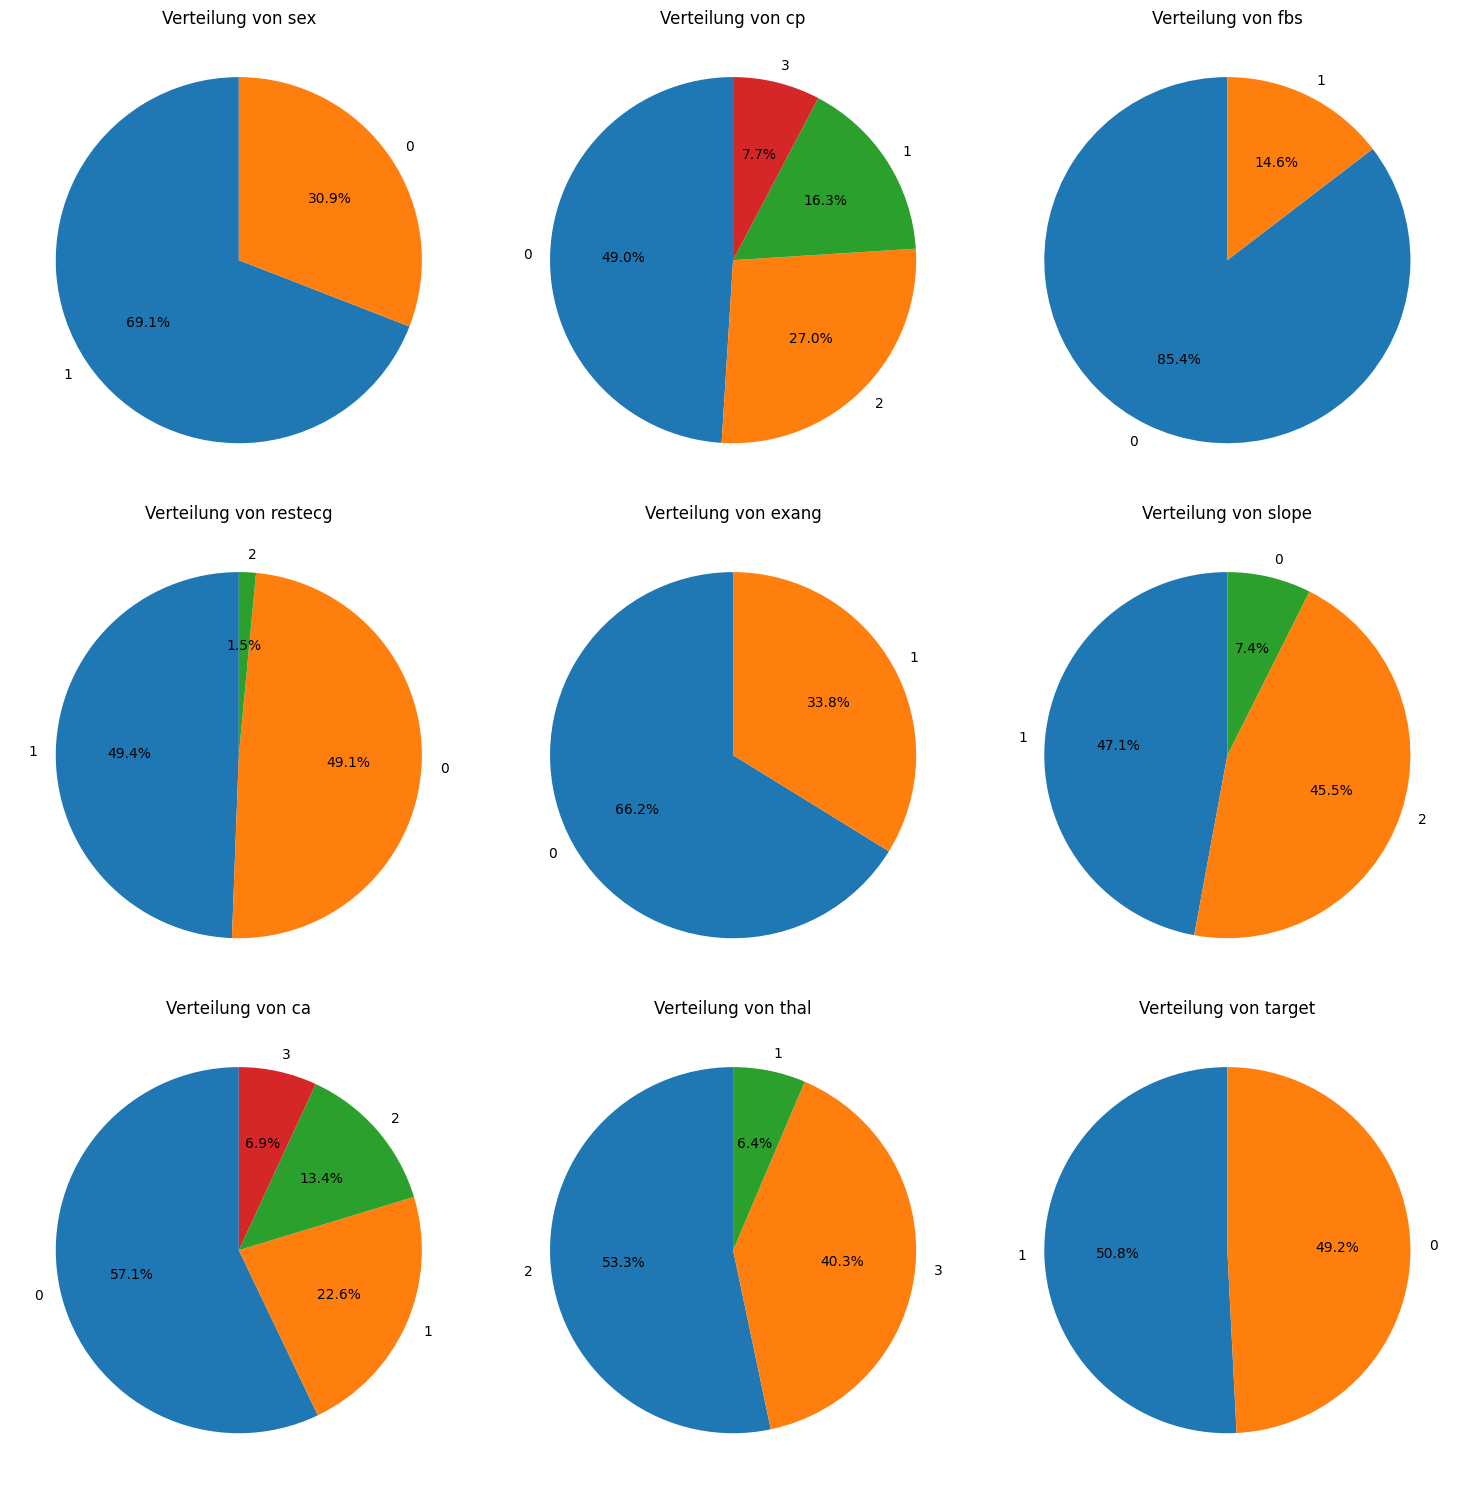

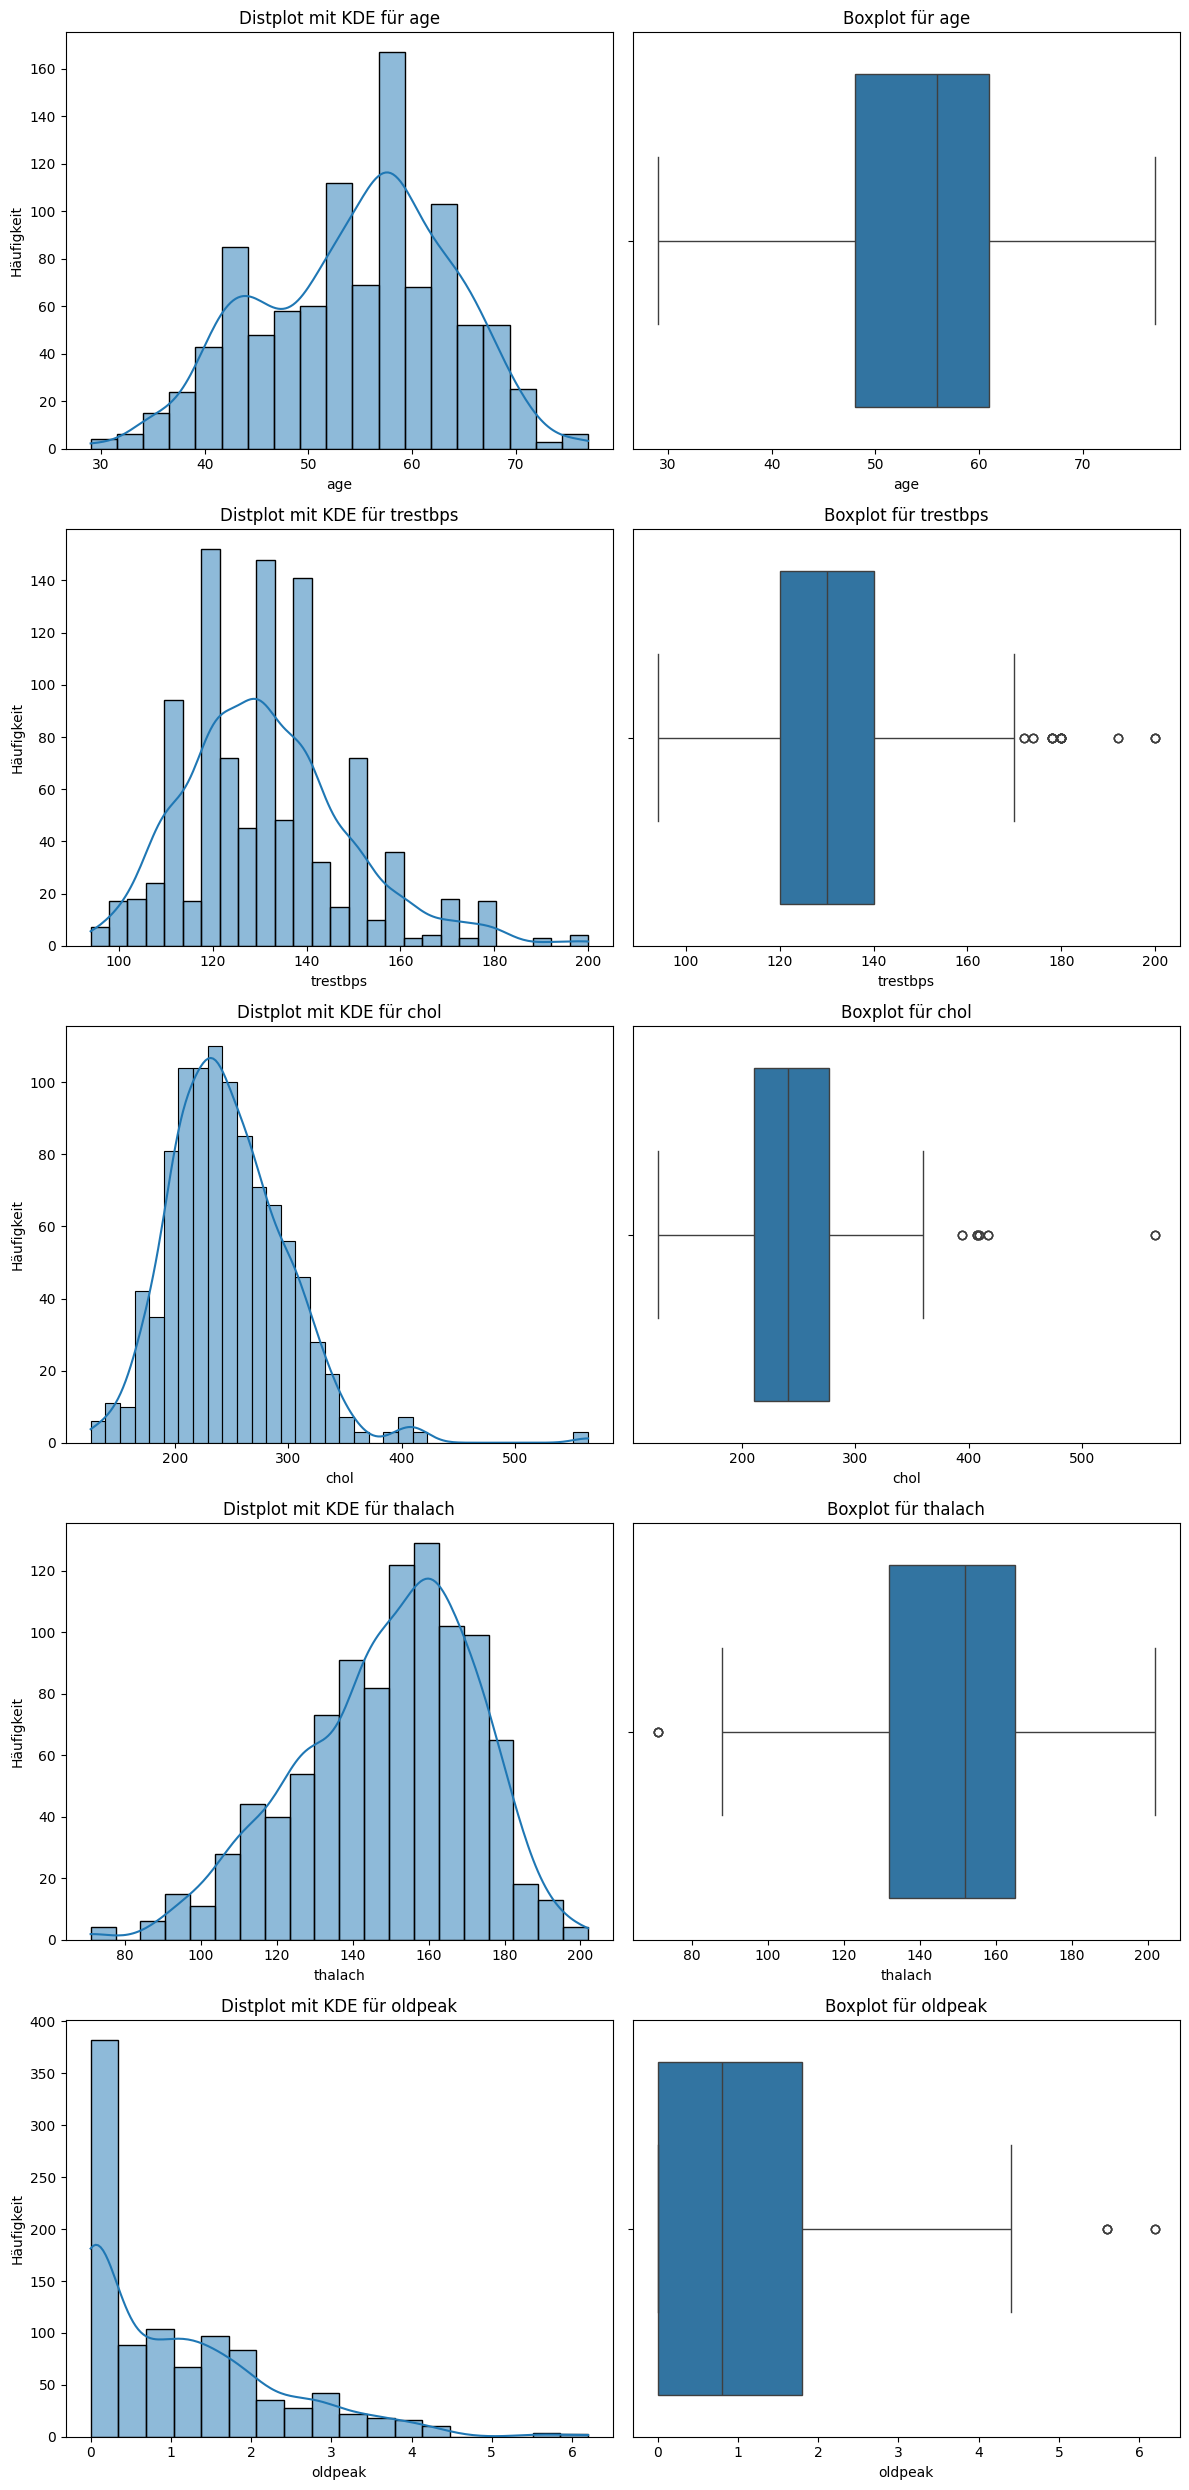

In [30]:
# A4: Stelle die Verteilung der Features dar

def plot_distribution(data, categorical_features, continuous_features):
    """
    Erstellt Pie-Charts für kategoriale Daten (3 Spalten) und für jedes kontinuierliche Feature
    einen Distplot mit KDE und einen Boxplot.
    
    Parameters:
    - data: pd.DataFrame, der Datensatz
    - categorical_features: list, Liste der kategorialen Features
    - continuous_features: list, Liste der kontinuierlichen Features
    """
    # Kategoriale Features (3 Spalten Layout)
    num_cat = len(categorical_features)
    rows = -(-num_cat // 3)  # Ceiling-Division
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axes = axes.flatten()
    
    for i, feature in enumerate(categorical_features):
        data[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,  ax=axes[i])
        axes[i].set_title(f'Verteilung von {feature}')
        axes[i].set_ylabel('')
    
    for i in range(num_cat, len(axes)):
        fig.delaxes(axes[i])  # Entfernt leere Plots
    
    plt.tight_layout()
    plt.show()
    
    # Kontinuierliche Features
    num_cont = len(continuous_features)
    fig, axes = plt.subplots(num_cont, 2, figsize=(12, 5 * num_cont))

    for i, feature in enumerate(continuous_features):
        # Je nach Anzahl der Zeilen: bei mehreren Zeilen liegt axes[i] als Liste der beiden Achsen vor
        if num_cont > 1:
            ax_hist, ax_box = axes[i]
        else:
            ax_hist, ax_box = axes[0], axes[1]
        
        sns.histplot(data[feature], kde=True, ax=ax_hist)
        ax_hist.set_title(f'Distplot mit KDE für {feature}')
        ax_hist.set_xlabel(feature)
        ax_hist.set_ylabel('Häufigkeit')
        
        sns.boxplot(x=data[feature], ax=ax_box)
        ax_box.set_title(f'Boxplot für {feature}')
        ax_box.set_xlabel(feature)
    
    plt.tight_layout()
    plt.show()


plot_distribution(data, categorical_features , continuous_features)

<details>
  <summary><b>📌 Wichtige Erkenntnisse</b></summary>
  <br>
  <ul>
    <li><b>Ungleichverteilung der Daten:</b> 
      <br> Sowohl kategoriale als auch kontinuierliche Features sind nicht gleichmäßig verteilt. 
      <br> Dies kann das Training neuronaler Netzwerke beeinflussen.</li>
    <br>
    <li><b>Neuronale Netzwerke sind skalenempfindlich:</b> 
      <br> Unterschiedliche Wertebereiche der Features können das Lernen erschweren. 
      <br><b>➜ Lösung:</b> Standardisierung oder Normalisierung der Daten.</li>
    <br>
    <li><b>Ausreißer in kontinuierlichen Features:</b> 
      <br> Werte außerhalb des folgenden Bereichs gelten als Ausreißer:
      <ul>
        <li><b>Untere Grenze:</b> Q1 − 1.5 × IQR</li>
        <li><b>Obere Grenze:</b> Q3 + 1.5 × IQR</li>
      </ul>
      <br><b>➜ Erklärung:</b> Der Interquartilsabstand (IQR) beschreibt die mittleren 50 % der Daten.
      Werte außerhalb dieses Bereichs sind potenzielle Ausreißer.</li>
  </ul>
</details>

#### 4.2 Korrelation und Zusammenhang zwischen Features

<details>
  <summary><b>Hinweis</b></summary>
  <p><code>.corr()</code>: Berechnet <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html">Korrelationsmatrix</A> aller Features</p>
  <p><code>sns.heatmap()</code>: Eine <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html"> Heatmap </a> bietet einen intuitiven und schnellen Einblick in Werte mittels Farbcodierung</p>
</details>

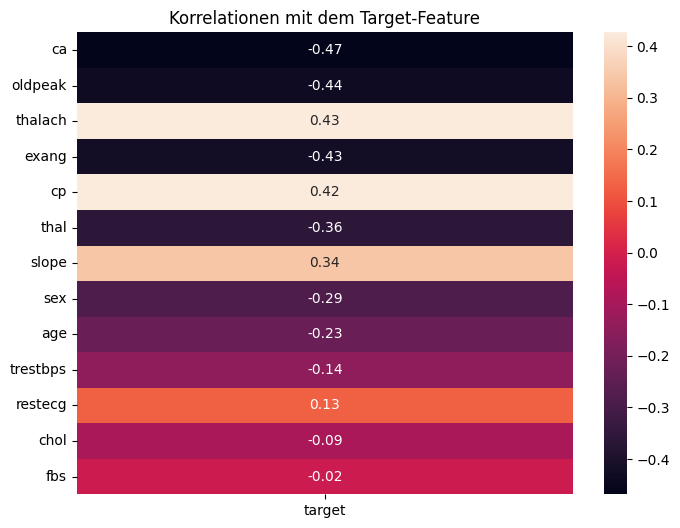

In [31]:
# A5: Stelle die Korrelation zwischen Target und den anderen Features grafisch dar

corr = data.corr()
target_corr = corr["target"].drop("target").sort_values(key=abs, ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr.to_frame(), annot=True,  fmt='.2f', cbar=True)
plt.title('Korrelationen mit dem Target-Feature')
plt.show()

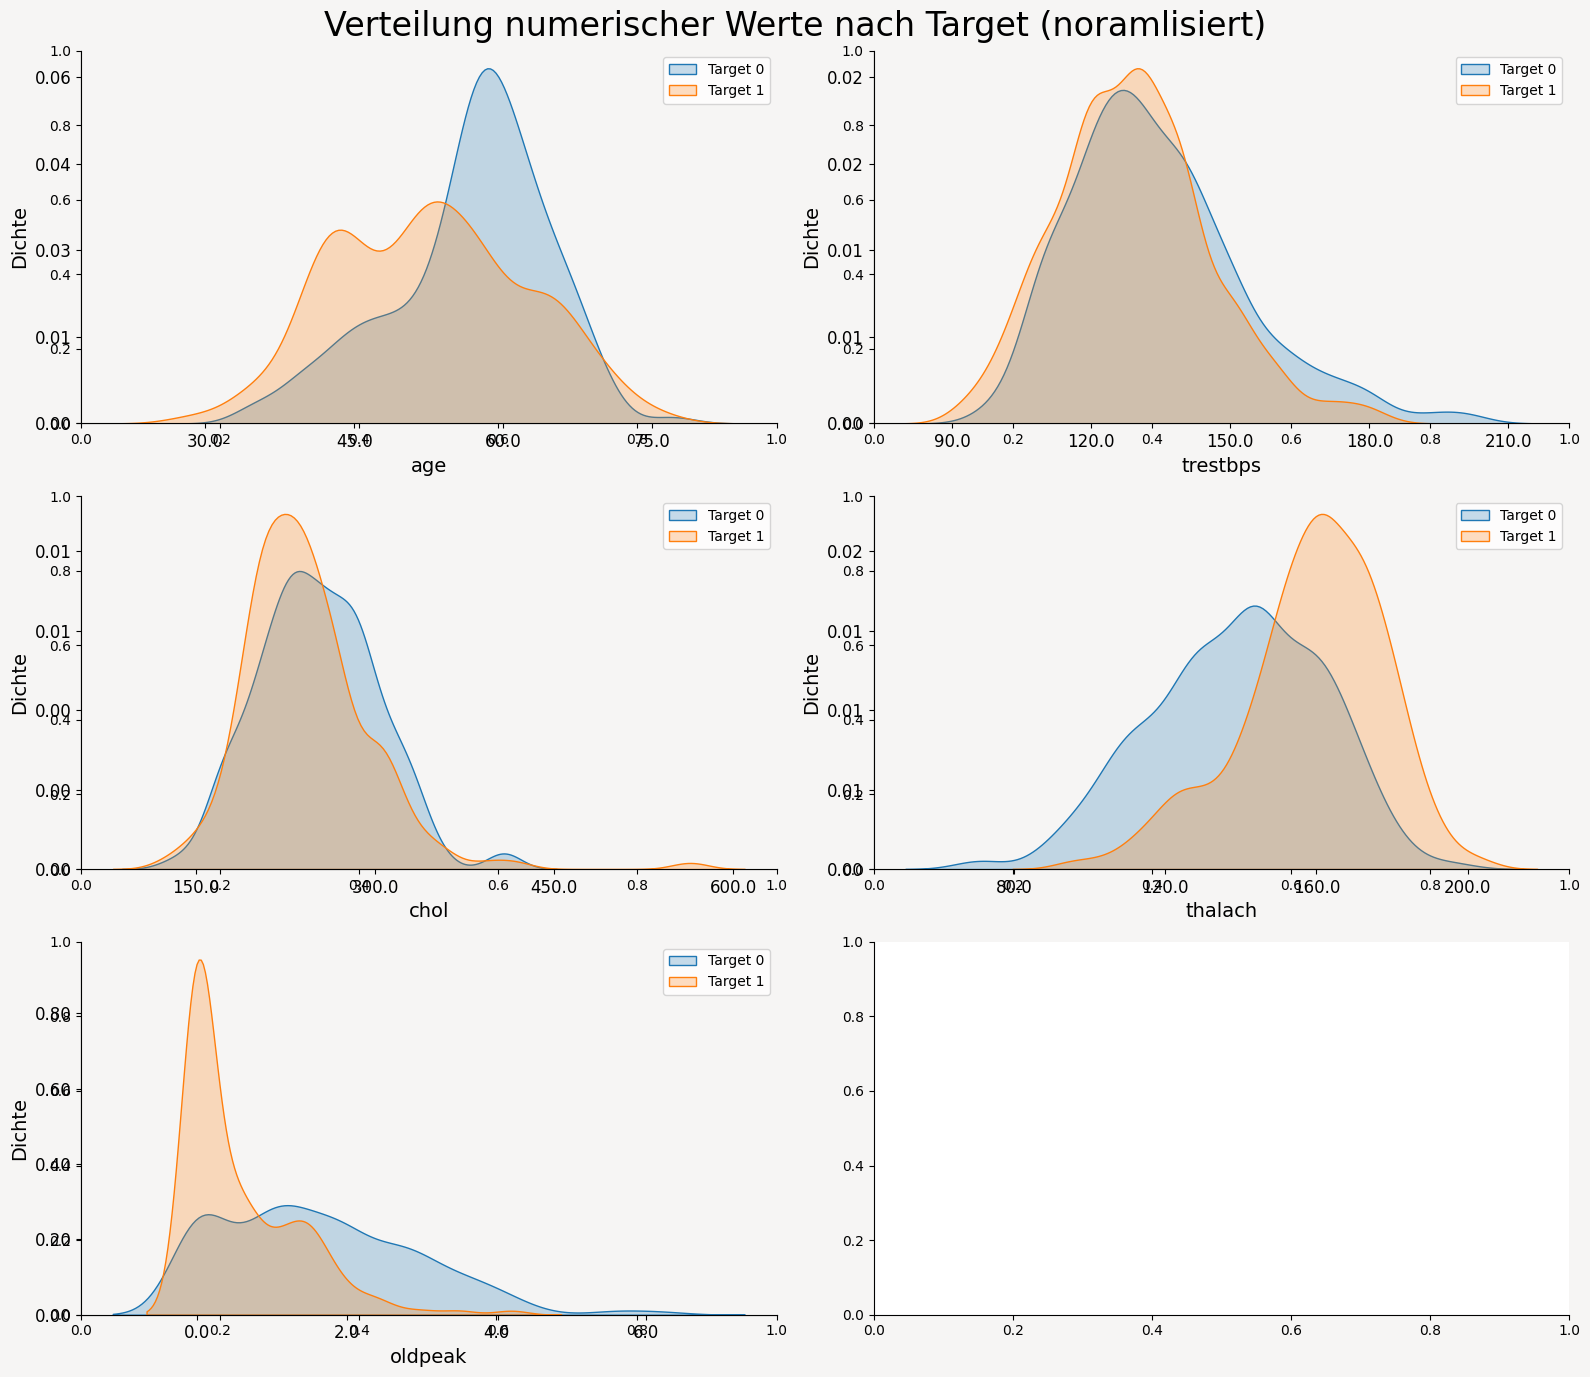

In [32]:
num_feats = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14), facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

# Berechne die Verteilung des Targets
target_counts = data["target"].value_counts(normalize=True)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')

    # Erstelle die KDEs für jede Klasse separat
    for target_value in sorted(data["target"].unique()):
        subset = data[data["target"] == target_value][col]
        
        # Normierte Dichte-Schätzung mit common_norm=True für gleiche Flächen
        sns.kdeplot(subset, label=f"Target {target_value}", fill=True, common_norm=True)
    
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Dichte", fontsize=14)
    plt.legend()
    sns.despine(right=True)

    # Formatierung der Achsenbeschriftungen
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # 5 gleichmäßige Schritte auf der x-Achse
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # 5 gleichmäßige Schritte auf der y-Achse

    # Verwende FormatStrFormatter, um die Beschriftungen zu formatieren
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))  # x-Achse: 1 Nachkommastelle
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))  # y-Achse: 2 Nachkommastellen

    # Verbessere die Lesbarkeit der Ticks
    plt.tick_params(axis='both', which='major', labelsize=12)

    i += 1

plt.suptitle('Verteilung numerischer Werte nach Target (noramlisiert)', fontsize=24)
plt.tight_layout()
plt.show()

### 5. Datenaufbereitung

#### 5.1 Daten aufteilen

Zuerst müssen die Daten in die Merkmale (X) und die Zielvariable (y) aufgeteilt werden. </br>
Um das Model später trainieren zu können und unser Ergebnis, an dem Model unbekannten Daten, zu testen müssen die Daten in Trainings-, Test- und Validierungsdaten aufgeteilt werden.
Zuerst die Aufteilung in Trainings und Testdaten um danach aus den Trainingsdaten Validierungsdaten zu extrahieren.


<details>
  <summary><b>Hinweis</b></summary>
  <p><code>.drop("target")</code>: Entfernt die Variable "target" aus den Features</p>
  <p><code>df["target"]</code>: Gibt die Spalte "target" zurück</p>
</details>

In [33]:
# A6: Unterteile die Daten in Merkmale (X) und Zielvariable (y)

X = data.drop('target', axis=1)  # Entferne die Zielvariable aus den Features
y = data['target']  # Zielvariable

<details>
  <summary><b>Hinweis</b></summary>
  <p><code>train_test_split(dataframe1, dateframe2, test_size=0.x, random_stat=42)</code>: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a> teilt die Dataframes nach mit der angegebenen Aufteilung auf</p>
</details>

In [34]:
# A7: Unterteile X und y in train, test und val Daten

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Dies ergibt:
# - 60% der Daten im Trainingsset
# - 20% der Daten im Validierungsset
# - 20% der Daten im Testset

#### 5.2 Daten skalieren

<details>
  <summary><b>Skalierung von Daten und der StandardScaler</b></summary>
  <p>Die <b>Skalierung</b> von Daten ist ein entscheidender Schritt in der Vorverarbeitung von Daten für maschinelles Lernen. Sie sorgt dafür, dass alle Merkmale (Features) auf einem ähnlichen Wertebereich liegen, was für viele Algorithmen wichtig ist, da diese oft empfindlich gegenüber der Skala der Eingabedaten sind.</p>

  <p><b>Warum Skalierung notwendig ist:</b></p>
  <ul>
    <li>Algorithmen wie <i>Gradient Descent</i> und <i>k-NN</i> sind empfindlich gegenüber der Skala der Eingabedaten. Wenn die Features unterschiedliche Skalen haben (z. B. ein Feature von 0 bis 1 und ein anderes von 0 bis 1000), kann das Modell Schwierigkeiten haben, die Daten zu verarbeiten und zu lernen.</li>
    <li>Skalierung sorgt dafür, dass alle Features einen ähnlichen Einfluss auf das Modell haben, was das Training stabiler und schneller macht.</li>
    <li>Beispiel: Wenn eines der Features eine viel größere Range hat, könnte das Modell dazu neigen, diesem Feature mehr Gewicht zu geben, obwohl es möglicherweise weniger wichtig ist.</li>
  </ul>

  <p><b>Was bewirkt die Skalierung?</b></p>
  <ul>
    <li>Die Skalierung verändert die Daten so, dass sie in einem bestimmten Bereich liegen oder eine bestimmte Verteilung haben. Häufig verwendete Skalierungsansätze sind die Standardisierung und Min-Max-Skalierung.</li>
    <li>Durch Skalierung wird der Mittelwert eines Features auf einen bestimmten Wert (z. B. 0) gesetzt und die Standardabweichung auf einen bestimmten Wert (z. B. 1), was die Daten zentriert und skaliert.</li>
  </ul>

  <p><b>Wie funktioniert der StandardScaler?</b></p>
  <p>Der <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html" target="_blank"><b>StandardScaler</b></a> von <i>scikit-learn</i> standardisiert die Features, indem er den Mittelwert (Durchschnitt) jedes Features auf 0 und die Standardabweichung auf 1 setzt. Die Formel lautet:</p>

  <pre>
    Z = (X - μ) / σ
  </pre>
  <p>Dabei ist:</p>
  <ul>
    <li><b>X</b>: Der ursprüngliche Wert des Features.</li>
    <li><b>μ</b>: Der Mittelwert des Features.</li>
    <li><b>σ</b>: Die Standardabweichung des Features.</li>
    <li><b>Z</b>: Der standardisierte Wert des Features.</li>
  </ul>

  <p>Der StandardScaler berechnet den Mittelwert und die Standardabweichung des Trainingsdatensatzes und wendet dann diese Werte auf die Trainings-, Validierungs- und Testdaten an (wobei er die Testdaten nur transformiert, nicht anpasst, um Datenleakage zu vermeiden).</p>

  <p>Die Vorteile des StandardScalers sind, dass er die Daten zentriert und skaliert, was insbesondere für Modelle wie <i>lineare Regression</i>, <i>Support Vector Machines</i> und neuronale Netze von Bedeutung ist.</p>

  <p>Weitere Informationen findest du in der <a href="https://scikit-learn.org/stable/modules/preprocessing.html" target="_blank">offiziellen Dokumentation von scikit-learn</a>.</p>

  <br>
  <img src="scaling.png" alt="Scaling vorher vs. danach" style="max-width: 100%; height: auto;"/>
</details>

In [35]:
# A8: Skaliere die Daten (X_train: fit_transform, X_val, X_test: transform)

scaler = StandardScaler()

# Fit und transformiere die Trainingsdaten
X_train_scaled = scaler.fit_transform(X_train)

# Transformiere die Validierungs- und Testdaten
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### 6. Model trainieren und auswerten

1. **Datenvorbereitung:** Konvertierung von bereits skalierten Daten in PyTorch-Tensoren.
2. **Modell-Definition:** Aufbau eines simplen Netzwerks mit zwei verborgenen Schichten.
3. **Training:** Training des Netzwerks über 2500 Epochen mit Aufzeichnung des Trainingsverlusts.
4. **Evaluation:** Berechnung von Accuracy, Precision und Recall auf den Validierungs- und Testdaten.
5. **Visualisierung:** Darstellung des Trainingsverlaufs und der Evaluationsmetriken als Grafiken.

In [36]:
# Parameter definieren
batch_size = 32
input_size = 13  # Anzahl der Eingabefeatures
output_size = 1  # Nur eine Ausgabe (Krankheit: Ja/Nein)
hidden_layers = [32, 16]  # Zwei verborgene Schichten
epochs = 1000
learning_rate = 0.001

#### 6.1 Daten in PyTorch-Tensoren umwandeln

 Ausgehend davon, dass die Daten bereits vorverarbeitet (z. B. skaliert) vorliegen, müssen wir sie in das Format bringen, das PyTorch für das Training benötigt. Dabei erfolgt Folgendes:

- Tensor-Konvertierung: Die Feature-Matrizen und Zielvariablen werden in PyTorch-Tensoren umgewandelt. Dabei wird der Datentyp auf ```float32``` festgelegt. Für die Zielvariablen wird zusätzlich die Dimension angepasst, sodass sie als Spaltenvektor vorliegen (mittels ```.view(-1, 1)```).

- Erstellung eines Datasets: Mit ```TensorDataset``` werden die zugehörigen Feature- und Ziel-Tensoren zusammengeführt, sodass jeder Eintrag im Dataset ein Tupel aus (Feature, Ziel) darstellt.

- Erstellung eines DataLoaders: Mittels ```DataLoader``` wird das Dataset in Batches unterteilt, um das Training zu erleichtern. Beim Trainings-Dataloader wird ```shuffle=True``` verwendet, um die Daten vor jedem Trainingsepochendurchlauf zufällig zu mischen – dies hilft, die Generalisierungsfähigkeit des Modells zu verbessern. Für den Validierungs- (und Test-) Dataloader wird ```shuffle=False``` gewählt, um die Reihenfolge der Daten beizubehalten.

In [37]:
# A9: Wandle die Daten in Pytorch-Tensoren um

# Hier gehe ich davon aus, dass die Daten bereits skaliert sind
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Erstelle DataLoader für das Training und die Validierung
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


#### 6.2 Modell definieren

- Das SimpleNN-Modell besteht aus einer Eingabeschicht, zwei verborgenen Schichten mit ReLU-Aktivierung und einer Ausgabeschicht, die eine Sigmoid-Aktivierung verwendet (ideal für binäre Klassifikation).
<details>
<summary><b>Hinweis</b></summary>
<p><a href="https://playground.tensorflow.org/">Hier</a> kannst du dier anschauen wie dein Netzwerk aussehen könnte un was die Parameter bewirken.</p>
<p><a href="https://yajm.medium.com/simple-neural-network-in-pytorch-step-by-step-guide-fe12bdbbae33">Hier</a> findest du eine simple Dokumentation zum erstellen eines neuronalen Netzwerkes.</p>
</br>
<p>Dies ist ein möglicher Aufbau des Netzwekrs:</p>
<img src="simplenn_arch.png" alt="SimpleNN Architektur" style="max-width: 100%; height: auto;"/>



</details>

In [38]:
# A10: Definiere das Modell

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(SimpleNN, self).__init__()
        layers = []
        # Eingabeschicht
        layers.append(nn.Linear(input_size, hidden_layers[0]))
        layers.append(nn.ReLU())
        # Verborgene Schichten
        for i in range(1, len(hidden_layers)):
            layers.append(nn.Linear(hidden_layers[i-1], hidden_layers[i]))
            layers.append(nn.ReLU())
        # Ausgabeschicht
        layers.append(nn.Linear(hidden_layers[-1], output_size))
        layers.append(nn.Sigmoid())  # Sigmoid für binäre Klassifikation (Wert zwischen 0 und 1)
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

# Modell instanziieren
model = SimpleNN(input_size, hidden_layers, output_size)

# Verlustfunktion und Optimierer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss für binäre Klassifikation
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#### 6.3 Modell trainieren

Der Code führt einen Trainingszyklus über eine festgelegte Anzahl an Epochen durch. Dabei werden in jeder Epoche die folgenden Schritte durchgeführt:

1. Moduswechsel und Initialisierung: 
    - Das Modell wird in den Trainingsmodus versetzt (mit ```model.train()```), damit alle Schichten (z. B. Dropout, BatchNorm) korrekt arbeiten. 
    - Eine Variable (```running_loss```) wird initialisiert, um den kumulativen Verlust der aktuellen Epoche zu speichern.

2. Batch-Weise Verarbeitung: 
    - Für jeden Batch aus dem Trainings-Dataloader wird ein Vorwärtsdurchlauf ausgeführt, indem das Modell die Eingaben verarbeitet und Vorhersagen (```outputs```) liefert.

    - Anschließend wird der Verlust (Loss) zwischen den Vorhersagen und den tatsächlichen Zielwerten berechnet.

    - Um die Gewichte des Modells zu aktualisieren, werden zunächst die Gradienten des Optimierers auf Null gesetzt, dann der Backpropagation-Schritt (```loss.backward()```) durchgeführt und schließlich mit ```optimizer.step()``` die Parameter aktualisiert.
    
    - Der Verlust des Batches wird akkumuliert.

3. Berechnung des durchschnittlichen Verlusts:

    - Nach Durchlauf aller Batches wird der durchschnittliche Verlust der Epoche berechnet und in einer Historienliste (```loss_history```) gespeichert.

4. Monitoring:

    - Alle 100 Epochen (oder in einem anderen gewünschten Intervall) wird der durchschnittliche Verlust ausgegeben, um den Trainingsfortschritt zu überwachen.

In [39]:
# A11: Training des Modells
loss_history = []  # zum Speichern des durchschnittlichen Verlusts pro Epoche

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Vorwärtsdurchlauf
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        # Backpropagation und Optimierung
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    loss_history.append(avg_loss)
    
    # Ausgabe des Verlusts alle 100 Epochen
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}')

Epoch [100/1000], Loss: 0.022189
Epoch [200/1000], Loss: 0.001485
Epoch [300/1000], Loss: 0.000288
Epoch [400/1000], Loss: 0.000078
Epoch [500/1000], Loss: 0.000024
Epoch [600/1000], Loss: 0.000008
Epoch [700/1000], Loss: 0.000003
Epoch [800/1000], Loss: 0.000001
Epoch [900/1000], Loss: 0.000000
Epoch [1000/1000], Loss: 0.000000


#### 6.4 Modell evaluieren

Nach dem Training wird das Modell in den Evaluierungsmodus versetzt (```mit model.eval()```). Unter Verwendung von ```torch.no_grad()``` werden Vorhersagen für Test- und Validierungsdaten gemacht. Die Ausgaben werden in Klassen umgewandelt (Schwellenwert 0.5) und gängige Metriken (Accuracy, Precision, Recall) berechnet und ausgegeben.

In [40]:
# A12: Modell evaluieren (Testdaten und Validierungsdaten)
model.eval()  # Setze das Modell in den Evaluierungsmodus
with torch.no_grad():
    # Vorhersagen auf den Testdaten
    y_pred_test = model(X_test_tensor)
    predicted_classes_test = (y_pred_test > 0.5).float()

    # Vorhersagen auf den Validierungsdaten
    y_pred_val = model(X_val_tensor)
    predicted_classes_val = (y_pred_val > 0.5).float()

    # Metriken für Testdaten berechnen
    accuracy_test = accuracy_score(y_test_tensor, predicted_classes_test)
    precision_test = precision_score(y_test_tensor, predicted_classes_test)
    recall_test = recall_score(y_test_tensor, predicted_classes_test)

    # Metriken für Validierungsdaten berechnens
    accuracy_val = accuracy_score(y_val_tensor, predicted_classes_val)
    precision_val = precision_score(y_val_tensor, predicted_classes_val)
    recall_val = recall_score(y_val_tensor, predicted_classes_val)

    print(f'\nTestdaten Metriken:')
    print(f'Accuracy: {accuracy_test:.6f}')
    print(f'Precision: {precision_test:.6f}')
    print(f'Recall: {recall_test:.6f}')

    print(f'\nValidierungsdaten Metriken:')
    print(f'Accuracy: {accuracy_val:.6f}')
    print(f'Precision: {precision_val:.6f}')
    print(f'Recall: {recall_val:.6f}')


Testdaten Metriken:
Accuracy: 0.990000
Precision: 0.989691
Recall: 0.989691

Validierungsdaten Metriken:
Accuracy: 0.980000
Precision: 0.982609
Recall: 0.982609


#### 6.5 Ergebnisse visualisieren

Stelle den Verlauf der ```loss_history```grafisch dar.

<details>
  <summary><b>Hinweis</b></summary>
  <p>Nutze Matplotlib (<code>plt</code>) oder Seaborn (<code>sns</code>) Plots um den Verlauf des loss über Zeit darzustellen.</p>
</details>

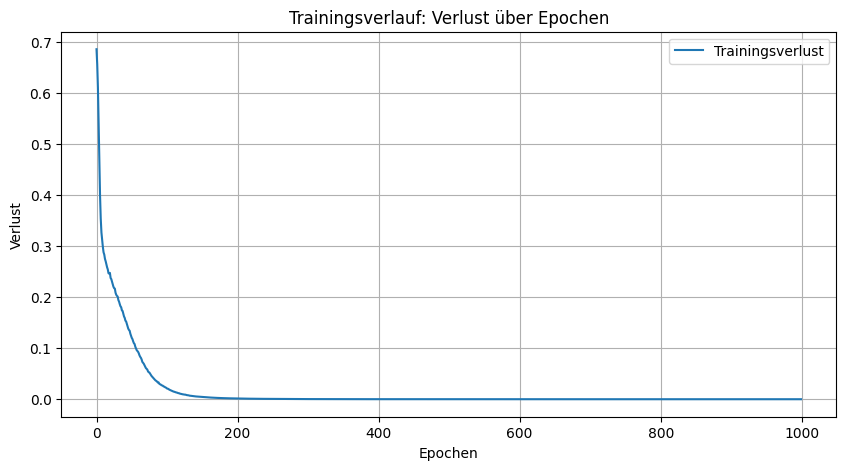

In [41]:
# A13: Visualisierung: Trainingsverlust über Epochen
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label="Trainingsverlust")
plt.xlabel("Epochen")
plt.ylabel("Verlust")
plt.title("Trainingsverlauf: Verlust über Epochen")
plt.legend()
plt.grid(True)
plt.show()

<details>
  <summary><b>Hinweis</b></summary>
  <p><code>y_val</code>: Enthält die "Ground Truth"</p>
  <p><code>df_val_original</code>: Soll Original- und Vorhersagedaten enthalten und angezeigt werden</p>
</details>

In [42]:
# A14: Vergleiche die Ergebnisse mit den originalen Daten

original_feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 
                          'fbs', 'restecg', 'thalach', 'exang', 
                          'oldpeak', 'slope', 'ca', 'thal']

# Ursprüngliche Feature-Daten der Validierungsdaten zurücktransformieren
X_val_original = scaler.inverse_transform(X_val_scaled)

# DataFrame mit den ursprünglichen Feature-Daten und den originalen Feature-Namen
df_val_original = pd.DataFrame(X_val_original, columns=original_feature_names)

# Füge die Ground Truth hinzu
df_val_original["Ground Truth"] = y_val.values

# Berechne Vorhersagen für die Validierungsdaten (sofern noch nicht geschehen)
model.eval()
with torch.no_grad():
    y_pred_val = model(X_val_tensor)
    predicted_classes_val = (y_pred_val > 0.5).float()

# Füge die Vorhersageergebnisse hinzu
df_val_original["Predicted Probability"] = y_pred_val.numpy().flatten()
df_val_original["Predicted Class"] = predicted_classes_val.numpy().flatten()

# Zeige die ersten Zeilen der kombinierten Tabelle an
display(df_val_original)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Ground Truth,Predicted Probability,Predicted Class
0,62.0,0.0,0.0,140.0,394.0,0.0,0.0,157.0,0.0,1.2,1.0,0.0,2.0,1,9.999993e-01,1.0
1,44.0,1.0,0.0,112.0,290.0,0.0,0.0,153.0,0.0,0.0,2.0,1.0,2.0,0,4.403494e-09,0.0
2,58.0,1.0,0.0,150.0,270.0,0.0,0.0,111.0,1.0,0.8,2.0,0.0,3.0,0,9.571551e-01,1.0
3,40.0,1.0,0.0,110.0,167.0,0.0,0.0,114.0,1.0,2.0,1.0,0.0,3.0,0,4.354601e-16,0.0
4,44.0,1.0,1.0,130.0,219.0,0.0,0.0,188.0,0.0,0.0,2.0,0.0,2.0,1,1.000000e+00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56.0,0.0,0.0,200.0,288.0,1.0,0.0,133.0,1.0,4.0,0.0,2.0,3.0,0,0.000000e+00,0.0
196,54.0,0.0,2.0,135.0,304.0,1.0,1.0,170.0,0.0,0.0,2.0,0.0,2.0,1,1.000000e+00,1.0
197,44.0,0.0,2.0,118.0,242.0,0.0,1.0,149.0,0.0,0.3,1.0,1.0,2.0,1,1.000000e+00,1.0
198,44.0,1.0,0.0,120.0,169.0,0.0,1.0,144.0,1.0,2.8,0.0,0.0,1.0,0,2.865875e-07,0.0
